<a href="https://colab.research.google.com/github/PavanTej219/FMML_Project_and_Labs/blob/main/AIML_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

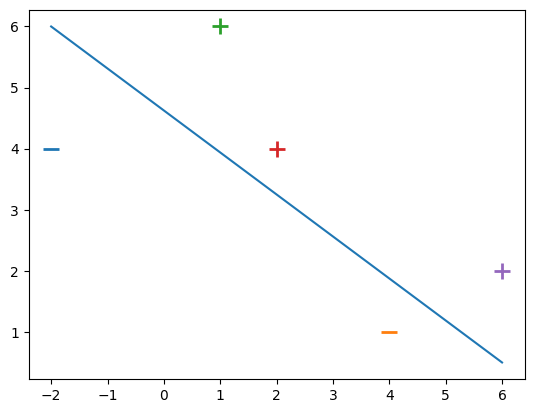

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

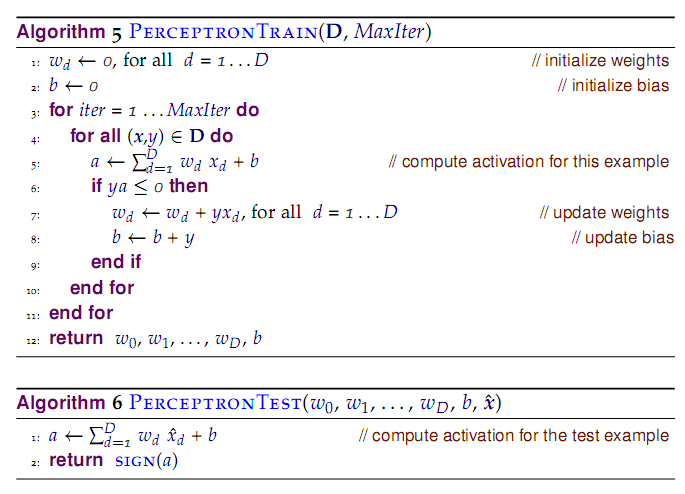

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

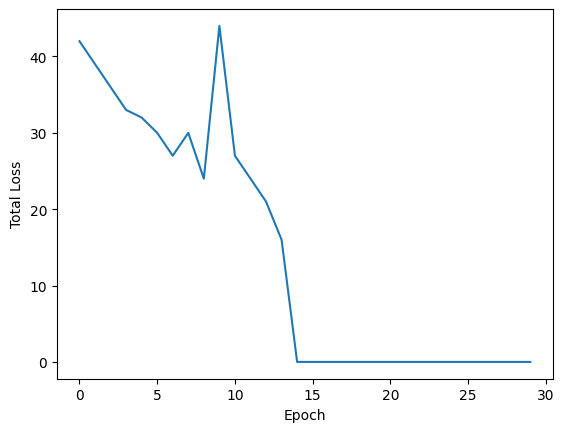

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

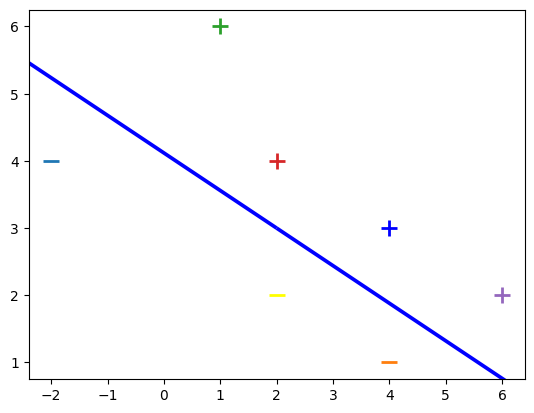

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



##**1.**

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load Banknote dataset
banknote = fetch_openml(name='banknote-authentication', version=1, as_frame=False)

X = banknote.data
Y = banknote.target

# Convert labels to -1 and 1
Y = np.where(Y == '1', 1, -1)  # '1' = authentic, '0' = forged

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train/test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


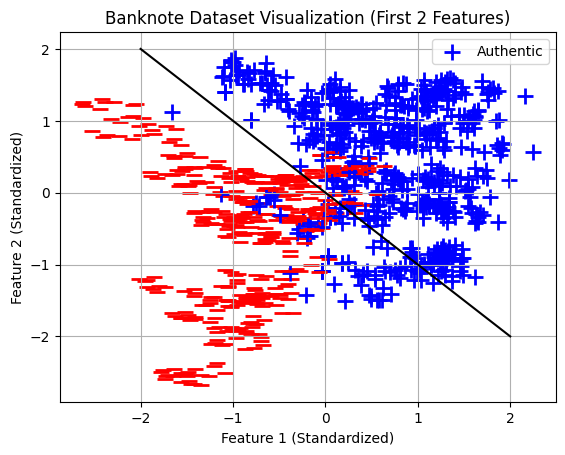

In [17]:
# Plot the first two features of the training data
for d, sample in enumerate(X_train):
    if Y_train[d] == -1:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2, color='red', label='Forged' if d == 0 else "")
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2, color='blue', label='Authentic' if d == 0 else "")

# Plot a dummy hyperplane (you can update this after training the perceptron)
plt.plot([-2, 2], [2, -2], 'k')

plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('Banknote Dataset Visualization (First 2 Features)')
plt.legend()
plt.grid(True)
plt.show()


In [19]:

def perceptron_algo(X, Y):
    w = np.zeros(X.shape[1])
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

# Train the perceptron
w = perceptron_algo(X_train, Y_train)
print("Weights learned by the Perceptron:", w)

Weights learned by the Perceptron: [ 6.61672634  4.61283972  6.13174007 -1.65682861]


In [20]:

def perceptron_algo_plot(X, Y, eta=1, epochs=30):
    w = np.zeros(X.shape[1])
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for i, x in enumerate(X):
            update = eta * X[i] * Y[i]
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w += update  # Apply the update directly to w
        errors.append(-total_error)

    plt.plot(errors, label=f'eta={eta}')
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title('Perceptron Training Loss')
    return w


##**2.**

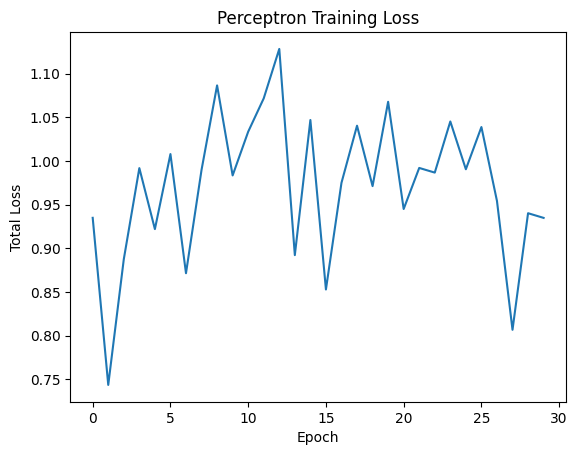

In [21]:

# Test with a low learning rate
w_low_eta = perceptron_algo_plot(X_train, Y_train, eta=0.01, epochs=30)

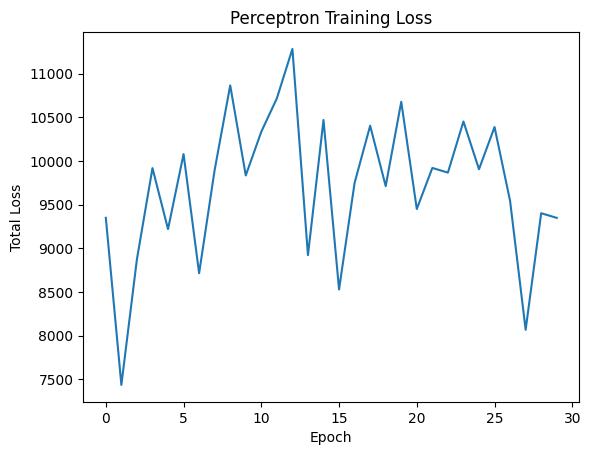

In [22]:

# Test with an extremely high learning rate
w_extreme_eta = perceptron_algo_plot(X_train, Y_train, eta=100, epochs=30)

In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [11]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


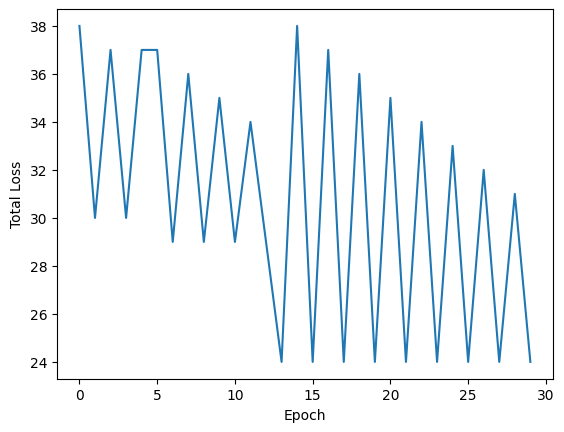

In [12]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

##Answers To above Questions:

**1.Is the "AND" Dataset Learnable by a Perceptron?**
i) Yes, the AND dataset is learnable by a Perceptron since it is linearly separable.
ii) Given ( w_0 = [0, 0] ) and ( b_0 = 0 ):

for a given iteration :

(x = [0, 0]), (y = -1): No change, ( w_1 = [0, 0] ), ( b_1 = -1 )
(x = [0, 1]), (y = -1): No change
(x = [1, 0]), (y = -1): No change
(x = [1, 1]), (y = +1): Update ( w_2 = [1, 1] ), ( b_2 = 0 )

**2.Boolean Functions Learnable by a Perceptron**
Out of the 16 possible boolean functions over 2-bit inputs, 6 are learnable: AND, OR, NAND, NOR, constant -1, and constant +1.

**3. Truth Table for Non-Learnable Functions**:
                                                                
  **XOR:**

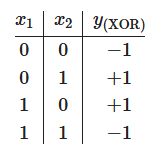

**XNOR:**

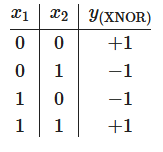